# 💡 1. Title

<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">🛣️ Exploratory Data Analysis and Cluster on Electric Vehicles Dataset 🔌</h1>

<center>
    <img src="https://www.elcarrocolombiano.com/wp-content/uploads/2020/05/20200805-TESLA-ROADSTER-PORTADA.jpg" style="width: 600px; height: auto; border-radius: 10px; box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.1);">
</center>

# 💡 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# 💡 3. DataFrame Info

In [4]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df1 = pd.read_csv('Alternative Fuel Vehicles US.csv')

In [5]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Function to plot data
def plot_data(df, x, y, title, xlabel, ylabel, kind="bar", rotation=0, figsize=(10,6)):
    plt.figure(figsize=figsize)
    if kind == "bar":
        sns.barplot(data=df, x=x, y=y, palette="viridis")
    elif kind == "count":
        sns.countplot(data=df, x=x, palette="viridis")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()


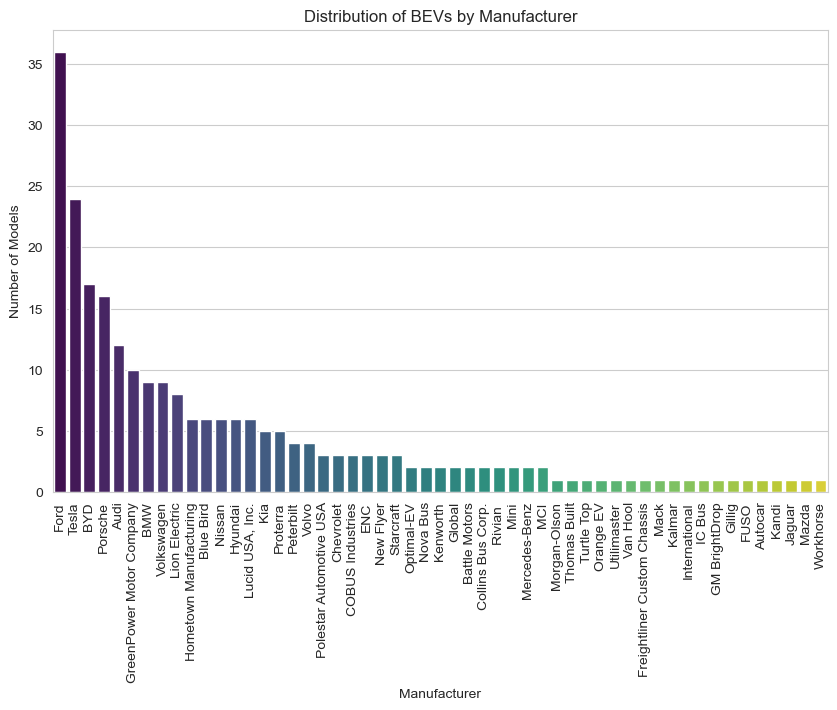

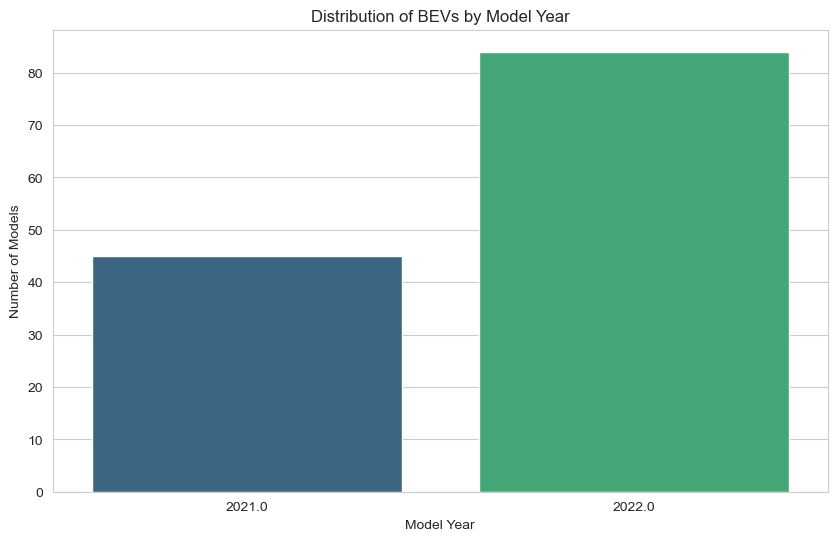

In [6]:

# 1. Market Trends: Distribution of BEVs by manufacturer and model year
# Filter BEVs from the alternative fuel vehicles dataset
bevs_afv_data = df1[df1['Fuel'] == 'Electric']

# Aggregate the data to count the number of models by manufacturer
bevs_manufacturer_dist = bevs_afv_data['Manufacturer'].value_counts().reset_index()
bevs_manufacturer_dist.columns = ['Manufacturer', 'Model Count']

# Aggregate the data to count the number of models by model year
bevs_model_year_dist = bevs_afv_data['Model Year'].value_counts().sort_index().reset_index()
bevs_model_year_dist.columns = ['Model Year', 'Model Count']

# Plotting the distribution of BEVs by manufacturer
plot_data(bevs_manufacturer_dist, 'Manufacturer', 'Model Count',
          'Distribution of BEVs by Manufacturer', 'Manufacturer', 'Number of Models', rotation=90)

# Plotting the distribution of BEVs by model year
plot_data(bevs_model_year_dist, 'Model Year', 'Model Count',
          'Distribution of BEVs by Model Year', 'Model Year', 'Number of Models', kind="bar", rotation=0)


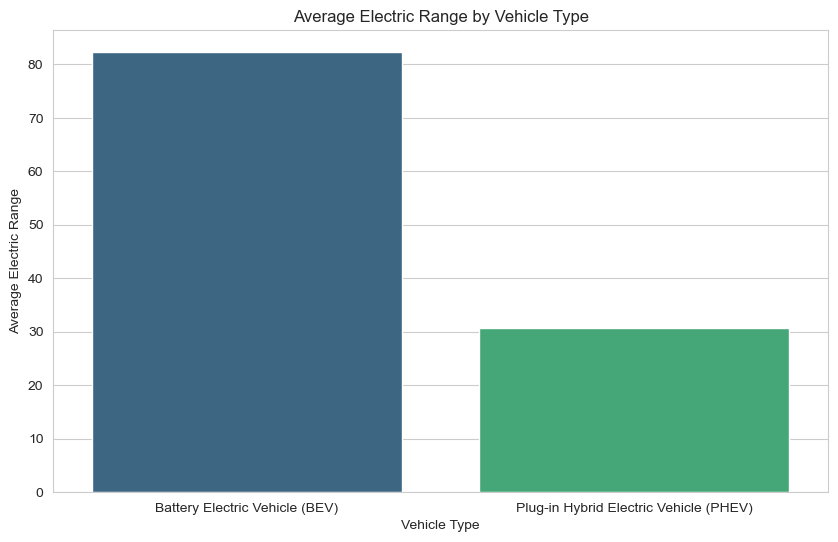

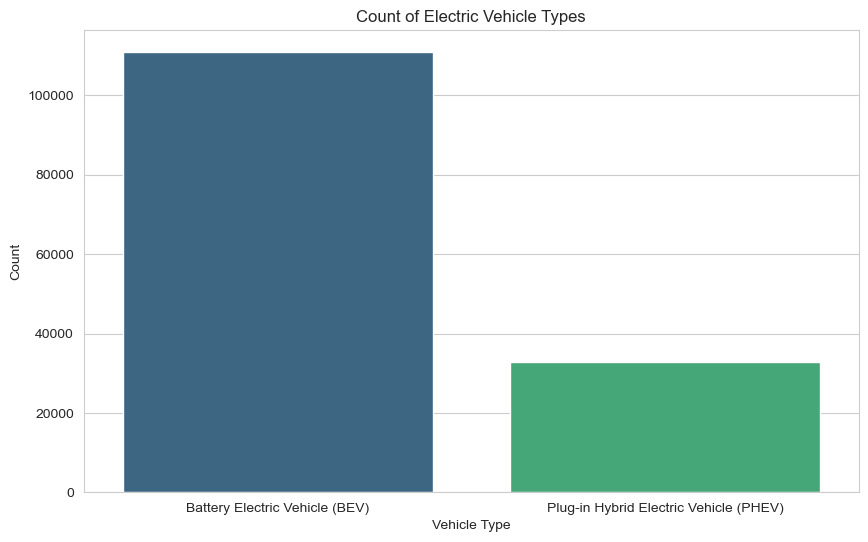

In [7]:
# Aggregate the data to get the average electric range by vehicle type
average_range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].mean().reset_index()

# Count the number of BEVs and PHEVs
vehicle_type_count = df['Electric Vehicle Type'].value_counts().reset_index()
vehicle_type_count.columns = ['Electric Vehicle Type', 'Count']

# Plotting the average electric range by vehicle type
plot_data(average_range_by_type, 'Electric Vehicle Type', 'Electric Range',
          'Average Electric Range by Vehicle Type', 'Vehicle Type', 'Average Electric Range', kind="bar")

# Plotting the count of BEVs and PHEVs
plot_data(vehicle_type_count, 'Electric Vehicle Type', 'Count',
          'Count of Electric Vehicle Types', 'Vehicle Type', 'Count', kind="bar")


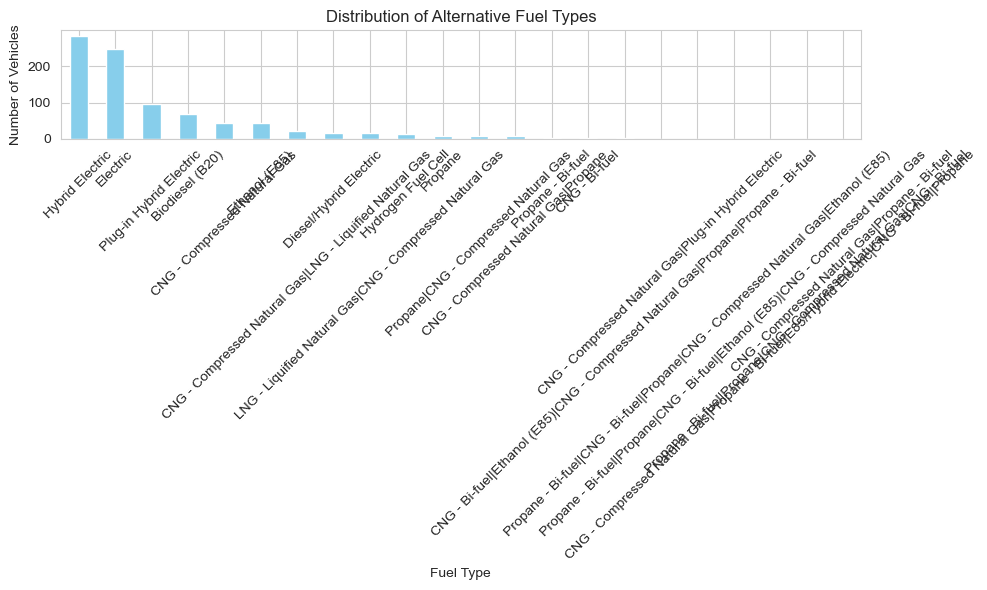

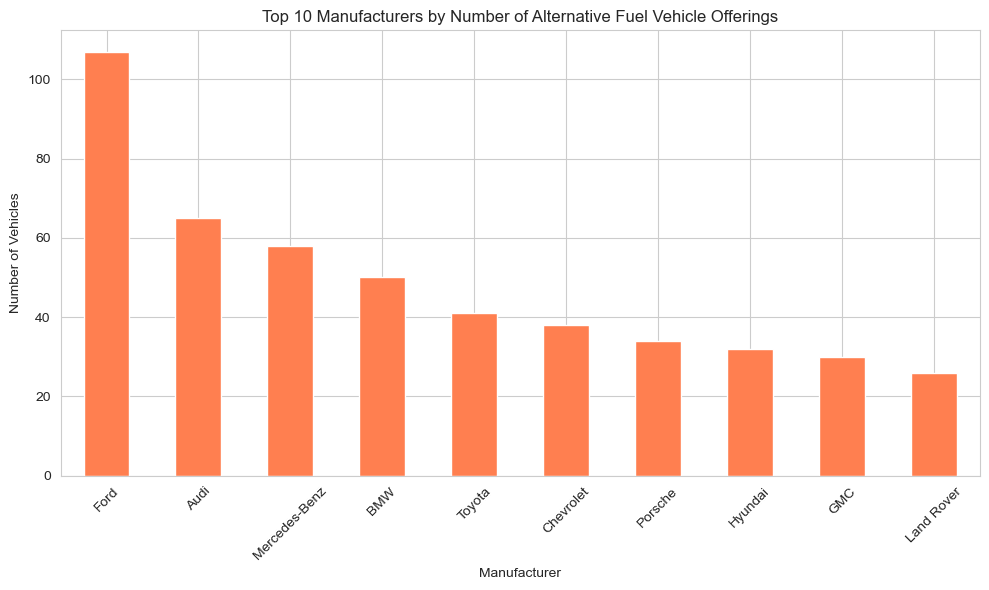

In [8]:
# Plotting the distribution of Fuel Types
plt.figure(figsize=(10,6))
fuel_type_counts = df1['Fuel'].value_counts()
fuel_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Alternative Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the number of offerings by manufacturer
plt.figure(figsize=(10,6))
manufacturer_counts = df1['Manufacturer'].value_counts().head(10)  # Top 10 manufacturers
manufacturer_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Manufacturers by Number of Alternative Fuel Vehicle Offerings')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


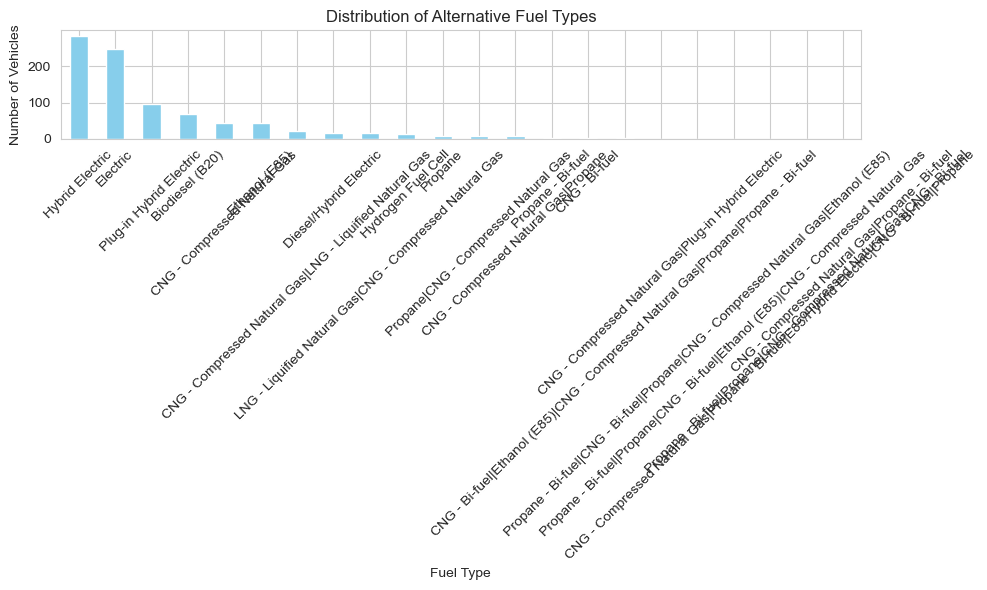

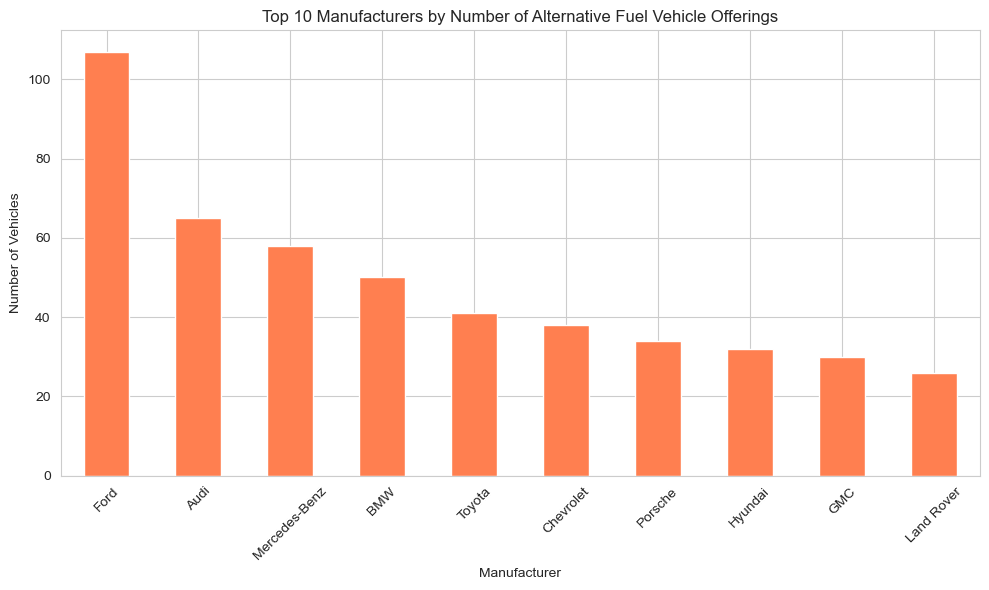

In [10]:
import matplotlib.pyplot as plt

# Plotting the distribution of Fuel Types
plt.figure(figsize=(10,6))
fuel_type_counts = df1['Fuel'].value_counts()
fuel_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Alternative Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the number of offerings by manufacturer
plt.figure(figsize=(10,6))
manufacturer_counts = df1['Manufacturer'].value_counts().head(10)  # Top 10 manufacturers
manufacturer_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Manufacturers by Number of Alternative Fuel Vehicle Offerings')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


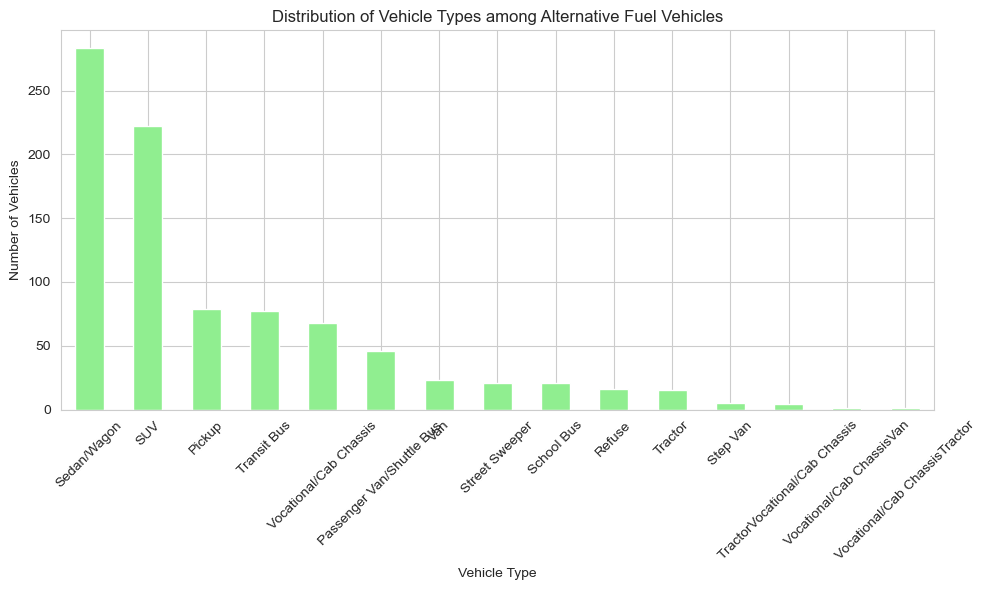

<Figure size 1000x600 with 0 Axes>

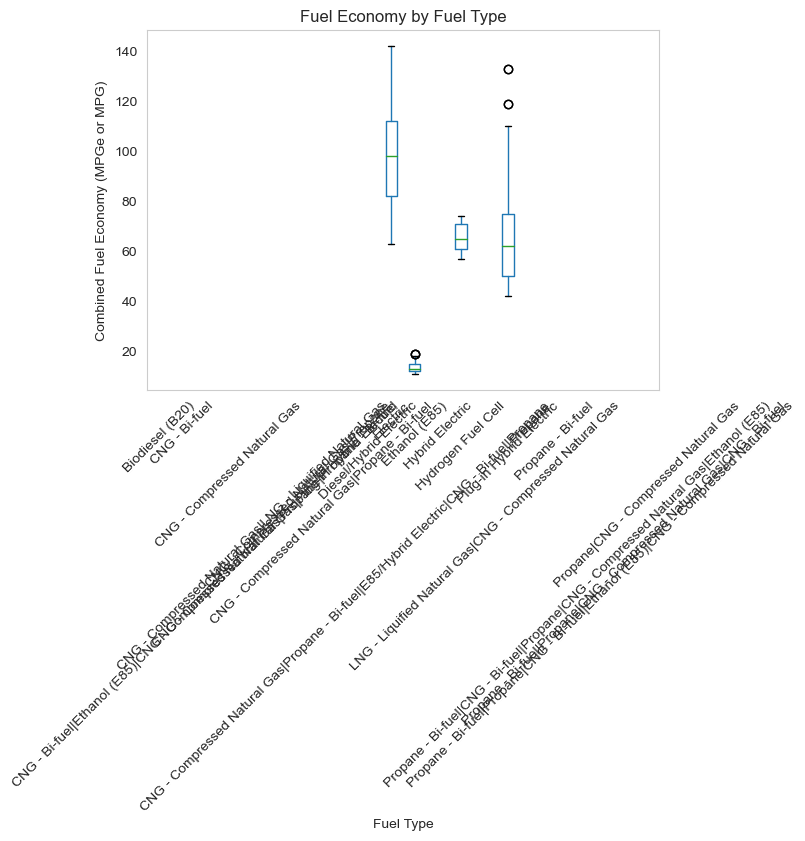

In [11]:
# Plotting the distribution of Vehicle Types
plt.figure(figsize=(10,6))
category_counts = df1['Category'].value_counts()
category_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Vehicle Types among Alternative Fuel Vehicles')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the Fuel Economy Statistics
# We'll create a box plot for combined fuel economy by fuel type
plt.figure(figsize=(10,6))
df1.boxplot(column='Alternative Fuel Economy Combined', by='Fuel', grid=False, rot=45)
plt.title('Fuel Economy by Fuel Type')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('Fuel Type')
plt.ylabel('Combined Fuel Economy (MPGe or MPG)')
plt.show()


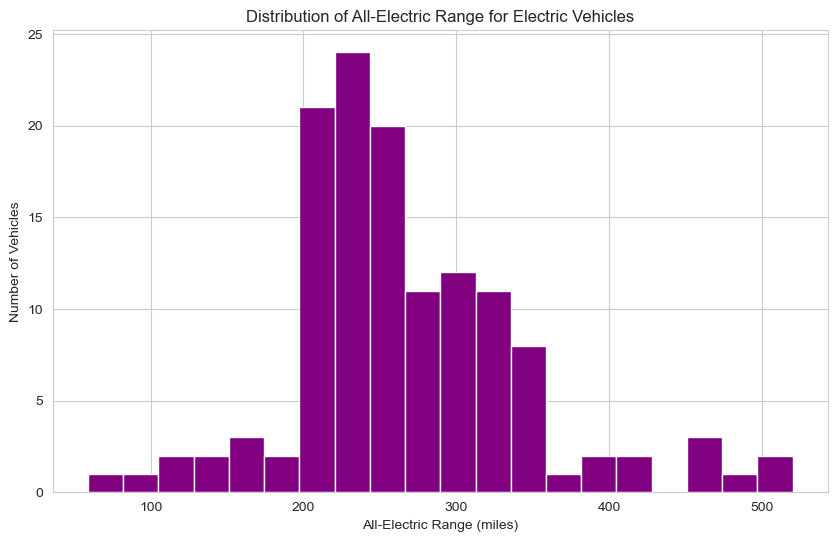

In [12]:
# Filtering the dataset for all-electric vehicles
all_electric_vehicles_df = df1[df1['Fuel'] == 'Electric']

# Plotting the distribution of All-Electric Range
plt.figure(figsize=(10,6))
all_electric_vehicles_df['All-Electric Range'].plot(kind='hist', bins=20, color='purple')
plt.title('Distribution of All-Electric Range for Electric Vehicles')
plt.xlabel('All-Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.show()


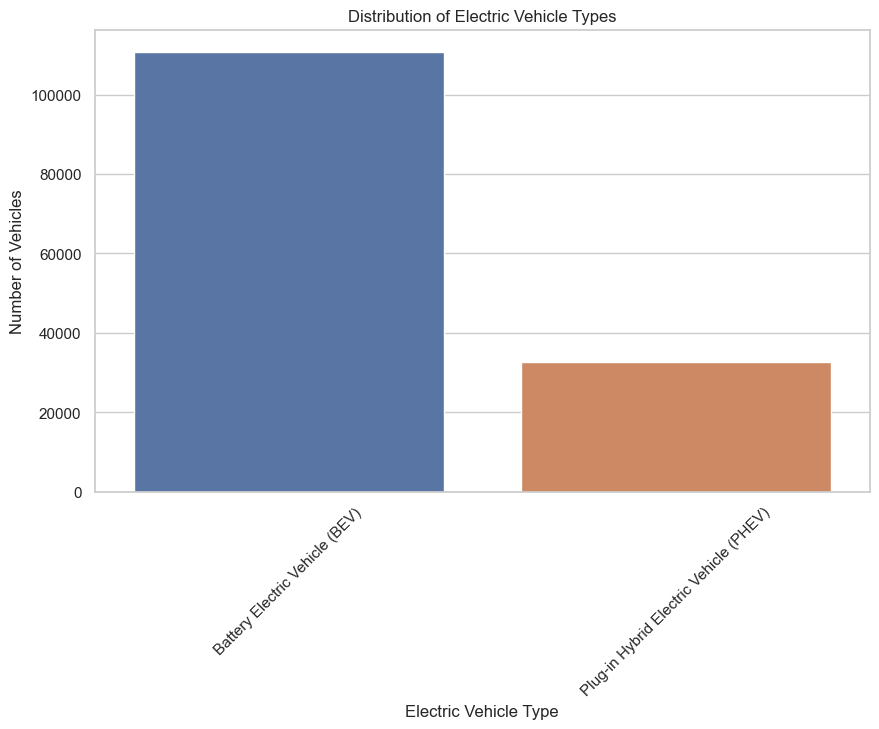

In [14]:
sns.set(style="whitegrid")

# Electric Vehicle Type Distribution Analysis
ev_type_distribution = df['Electric Vehicle Type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
ev_type_distribution_plot = sns.barplot(x=ev_type_distribution.index, y=ev_type_distribution.values)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)

# Show the plot
plt.show()


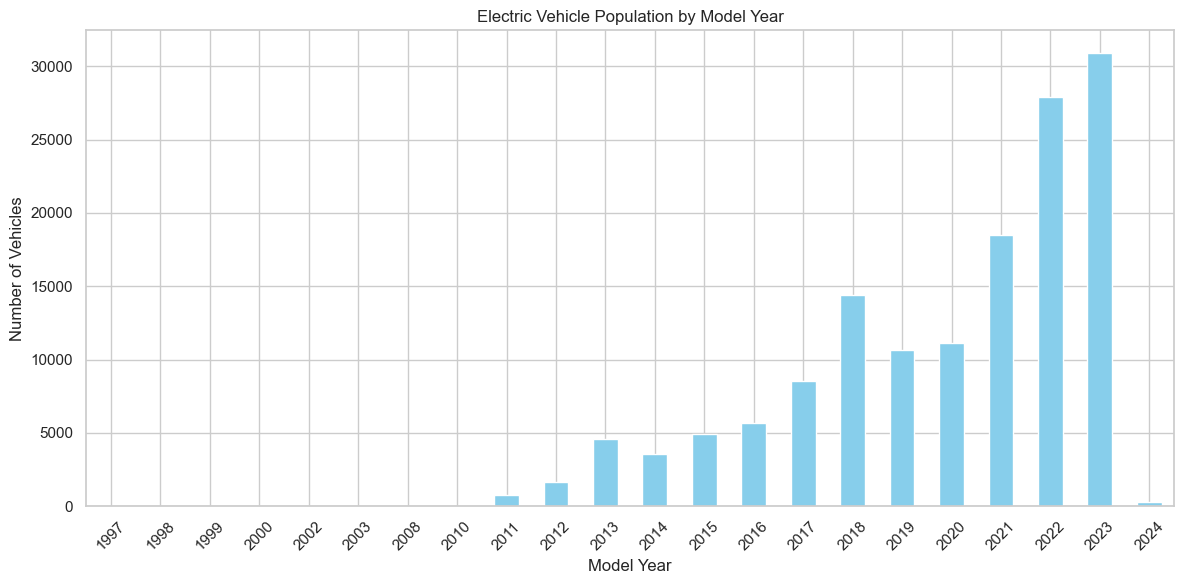

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Model Year Trend Analysis
model_year_counts = df['Model Year'].value_counts().sort_index()

# Plotting the Model Year Trend
plt.figure(figsize=(12, 6))
model_year_counts.plot(kind='bar', color='skyblue')
plt.title('Electric Vehicle Population by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


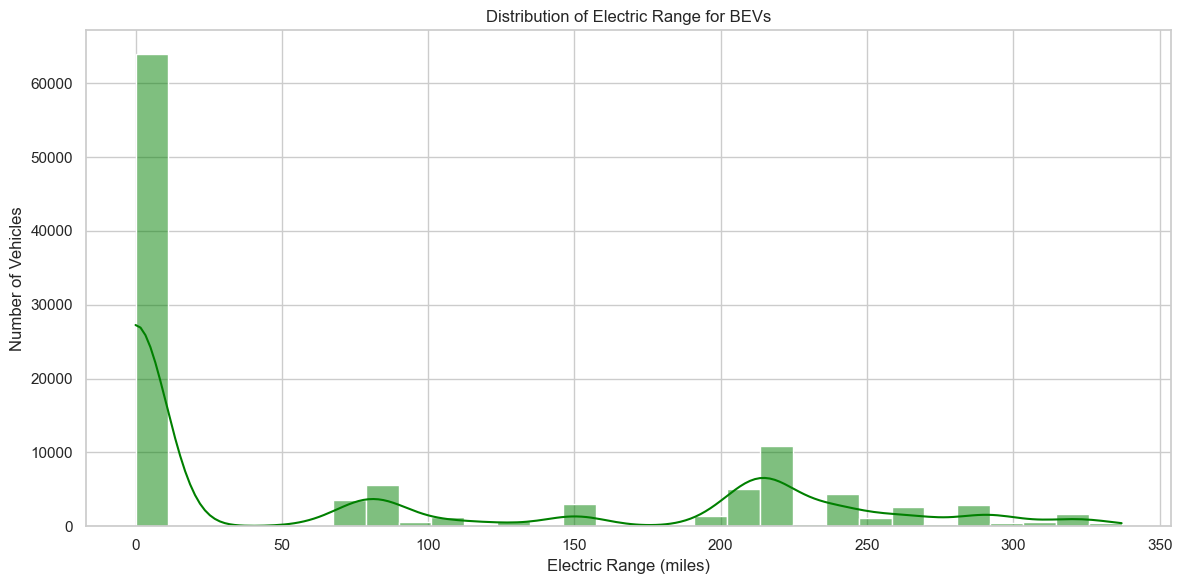

count    110865.000000
mean         82.263825
std         107.379669
min           0.000000
25%           0.000000
50%           0.000000
75%         208.000000
max         337.000000
Name: Electric Range, dtype: float64

In [16]:
bevs_data = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

# Histogram of Electric Range for BEVs
plt.figure(figsize=(12, 6))
sns.histplot(bevs_data['Electric Range'], bins=30, color='green', kde=True)
plt.title('Distribution of Electric Range for BEVs')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

# Descriptive statistics for electric range
electric_range_stats = bevs_data['Electric Range'].describe()
electric_range_stats


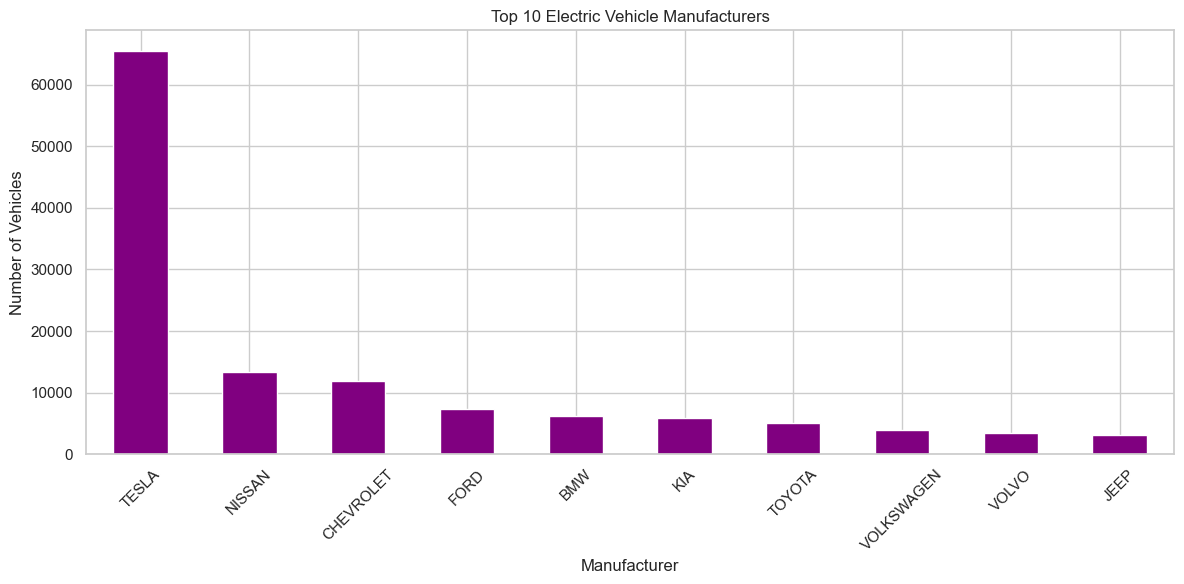

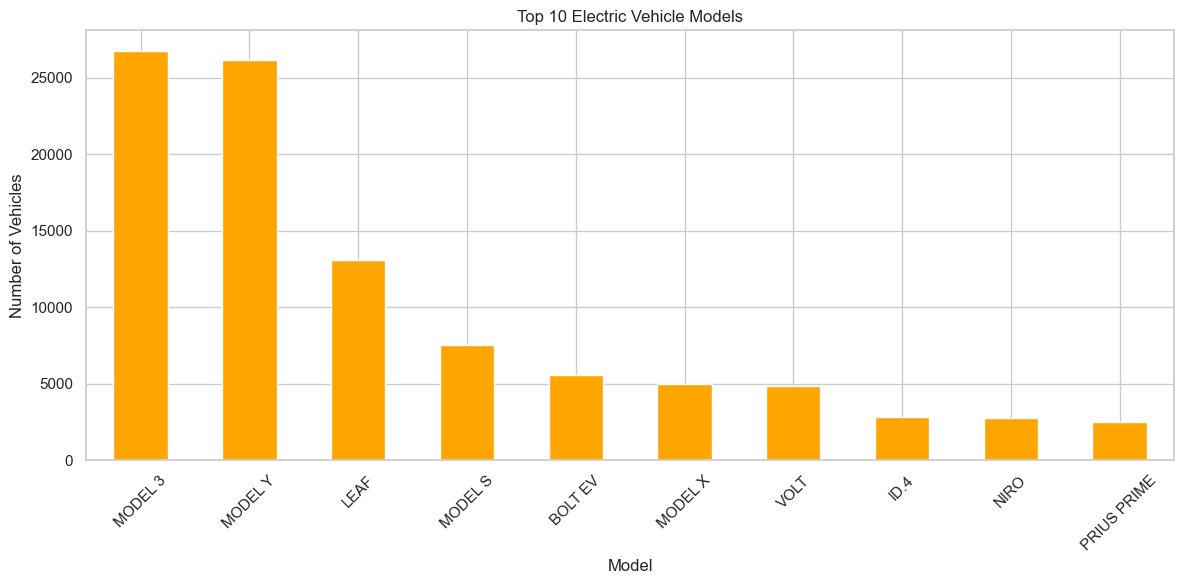

(Make
 TESLA         65552
 NISSAN        13317
 CHEVROLET     11816
 FORD           7307
 BMW            6209
 KIA            5922
 TOYOTA         5074
 VOLKSWAGEN     3914
 VOLVO          3415
 JEEP           3084
 Name: count, dtype: int64,
 Model
 MODEL 3        26766
 MODEL Y        26194
 LEAF           13093
 MODEL S         7542
 BOLT EV         5599
 MODEL X         5002
 VOLT            4884
 ID.4            2839
 NIRO            2764
 PRIUS PRIME     2506
 Name: count, dtype: int64)

In [17]:
# Counting the occurrences of each make
make_counts = df['Make'].value_counts().head(10)  # Top 10 makes

# Counting the occurrences of each model
model_counts = df['Model'].value_counts().head(10)  # Top 10 models

# Plotting the top manufacturers
plt.figure(figsize=(12, 6))
make_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Electric Vehicle Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the top models
plt.figure(figsize=(12, 6))
model_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Electric Vehicle Models')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

make_counts, model_counts


Shashank*****

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143596 entries, 0 to 143595
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         143596 non-null  object 
 1   County                                             143574 non-null  object 
 2   City                                               143574 non-null  object 
 3   State                                              143596 non-null  object 
 4   Postal Code                                        143574 non-null  float64
 5   Model Year                                         143596 non-null  int64  
 6   Make                                               143596 non-null  object 
 7   Model                                              143596 non-null  object 
 8   Electric Vehicle Type                              143596 non-null  object

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                22
City                                                  22
State                                                  0
Postal Code                                           22
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 327
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                      22
2020 Census Tract                                     22
dtype: int64

# 💡 4. EDA !! 

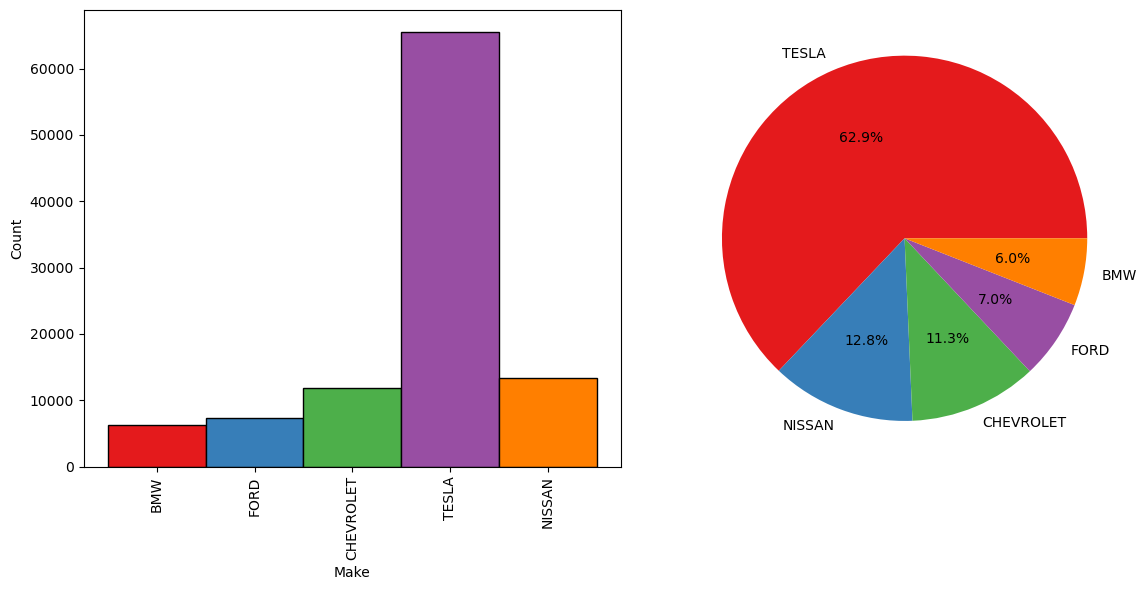

In [7]:
top_5_makes = df['Make'].value_counts().nlargest(5).index

filtered_df = df[df['Make'].isin(top_5_makes)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
graphic = sns.histplot(filtered_df, x="Make")

custom_palette = sns.color_palette("Set1", n_colors=len(filtered_df['Make'].unique()))

for i, bar in enumerate(graphic.patches):
    bar.set_facecolor(custom_palette[i])

ax = plt.gca()
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, rotation=90)

plt.subplot(1, 2, 2)
make_counts = filtered_df['Make'].value_counts()
plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', colors=custom_palette)

plt.tight_layout()
plt.show()

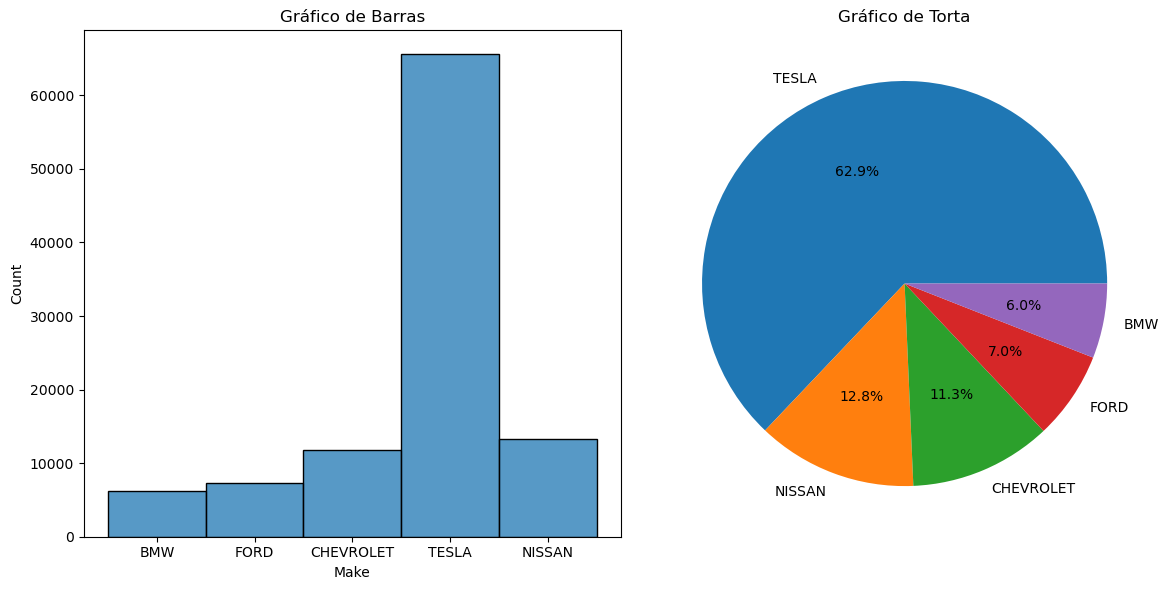

In [8]:
filtered_df = df[df['Make'].isin(top_5_makes)]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Definir el primer gráfico
sns.histplot(data=filtered_df, x="Make")
plt.title("Gráfico de Barras")

# Crear un gráfico de torta
plt.subplot(1, 2, 2)  # Definir el segundo gráfico
make_counts = filtered_df['Make'].value_counts()
plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%')
plt.title("Gráfico de Torta")

plt.tight_layout()
plt.show()

<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">An In-depth Guide</h3>
<center>
    <img src="https://www.diariomotor.com/imagenes/2012/10/2012-tesla-model-s_100365766_h.jpg" style="width: 250px; height: auto; border-radius: 10px; box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.1);">
</center>

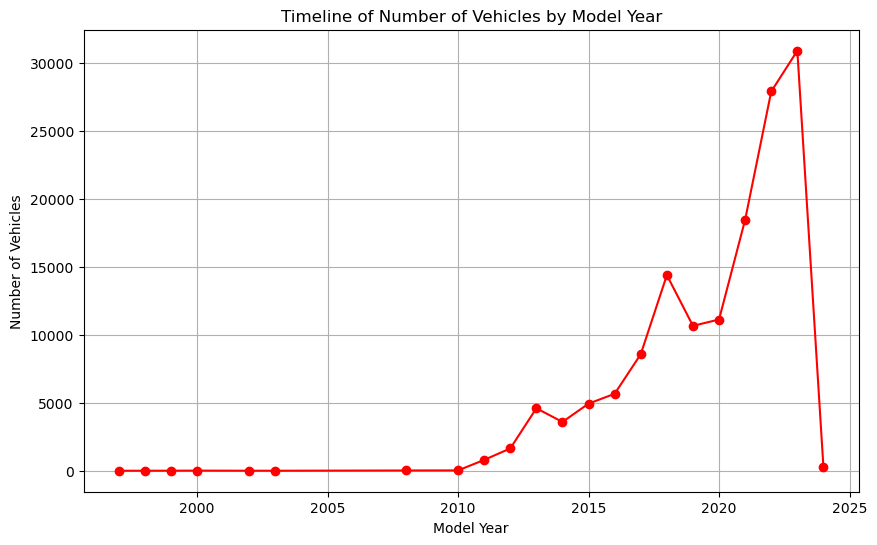

In [9]:
plt.figure(figsize=(10, 6))
df['Model Year'].value_counts().sort_index().plot(kind='line', marker='o', color='r')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.title('Timeline of Number of Vehicles by Model Year')
plt.grid(True)
plt.show()

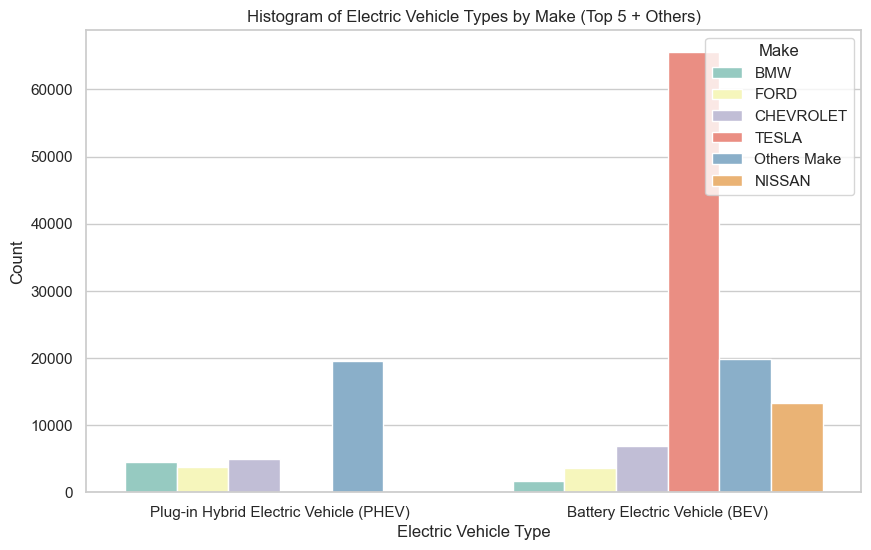

In [10]:
top_5_makes = df['Make'].value_counts().nlargest(5).index

df['Make Grouped'] = df['Make'].apply(lambda x: x if x in top_5_makes else 'Others Make')

filtered_df = df[df['Electric Vehicle Type'].notnull()]

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=filtered_df, x="Electric Vehicle Type", hue="Make Grouped", palette="Set3")
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Histogram of Electric Vehicle Types by Make (Top 5 + Others)')
plt.legend(title='Make', loc='upper right')

plt.show()

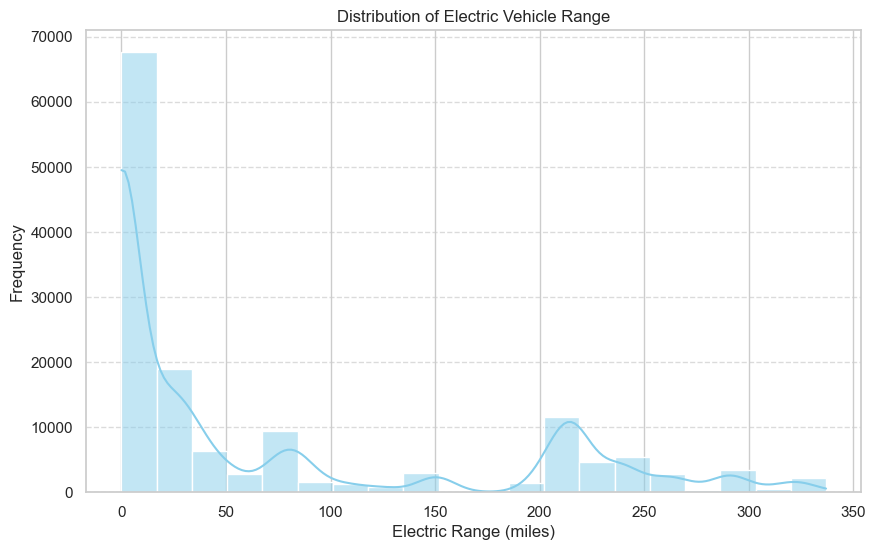

In [11]:
filtered_df = df[df['Electric Range'].notnull()]

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(data=filtered_df, x="Electric Range", bins=20, kde=True, color="skyblue")
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Vehicle Range')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 💡 5. Let's try clusters !!!

<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">🚗 1. Drop Columns</h3>

In [12]:
columns_to_delete = ["VIN (1-10)", "County", "City", "State", "Postal Code", "Vehicle Location", "2020 Census Tract"]
for column in columns_to_delete:
    df = df.drop(column, axis=1)

<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">🚗 2. Check Nulls</h3>

In [13]:
columns_to_check = [
    "Model Year",
    "Make",
    "Model",
    "Electric Vehicle Type",
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility",
    "Electric Range",
    "Base MSRP",
    "Legislative District",
    "DOL Vehicle ID",
    "Electric Utility",
    "Make Grouped"
]

# Elimina las filas con NaN en las columnas especificadas
df = df.dropna(subset=columns_to_check)

<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">🚗 3. Label Encoder</h3>

In [14]:
columns_to_encode = ['Make', 'Model', 'Electric Vehicle Type', "Clean Alternative Fuel Vehicle (CAFV) Eligibility", 
                    "Electric Utility", "Make Grouped"]

le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">🚗 4. Confirm that it was done 👀</h3>

In [15]:
df.sample(1).T

,67088
Model Year,2022.0
Make,16.0
Model,43.0
Electric Vehicle Type,0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,1.0
Electric Range,0.0
Base MSRP,0.0
Legislative District,41.0
DOL Vehicle ID,194880108.0
Electric Utility,73.0


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">🚗 5. Cluster</h3>

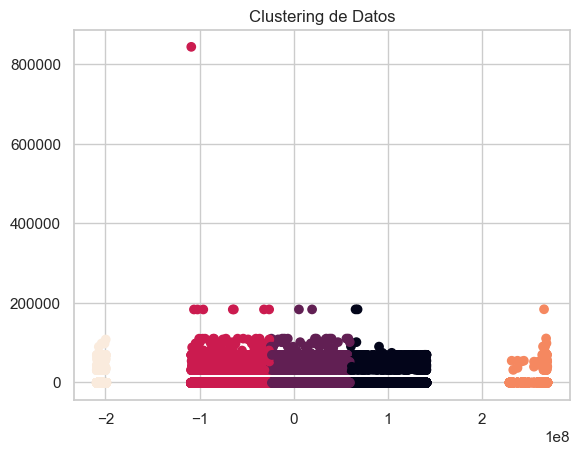

In [16]:
n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X = df
kmeans.fit(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
labels = kmeans.labels_

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
plt.title('Clustering de Datos')
plt.show()

In [17]:
total_electric = df.pivot_table(columns=['Model Year'], aggfunc='size')

Model Year
1997        1
1998        1
1999        4
2000        9
2002        2
2003        1
2008       18
2010       25
2011      797
2012     1639
2013     4586
2014     3575
2015     4922
2016     5647
2017     8556
2018    14361
2019    10635
2020    11095
2021    18399
2022    27841
2023    30882
2024      273
dtype: int64


In [18]:
Ncars = total_electric.reset_index()
Ncars = Ncars.rename(columns={"Model Year": "year", 0: "total_cars"})
# Drop 2023 cause there are not enough values
Ncars = Ncars.drop([0, 19])
Ncars

,year,total_cars
1,1998,1
2,1999,4
3,2000,9
4,2002,2
5,2003,1
6,2008,18
7,2010,25
8,2011,797
9,2012,1639
10,2013,4586


In [19]:
#Store columns in x and y variables
x = Ncars["year"]
y = Ncars["total_cars"]

In [20]:
OldCars = Ncars.iloc[:6, :]
NewCars = Ncars.iloc[6:, :]

In [21]:
x1 = OldCars["year"]
y1 = OldCars["total_cars"]

x2 = NewCars["year"]
y2 = NewCars["total_cars"]

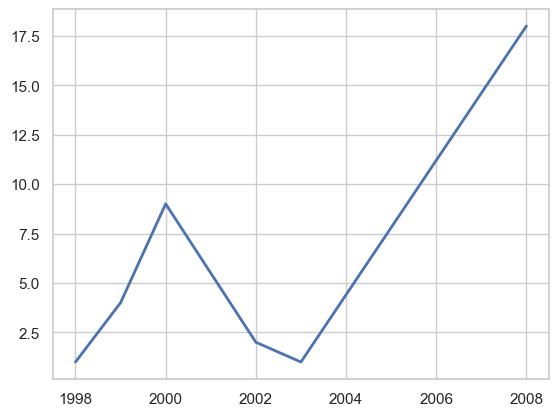

In [22]:
fig, ax = plt.subplots()

ax.plot(x1, y1, linewidth=2.0)

plt.show()

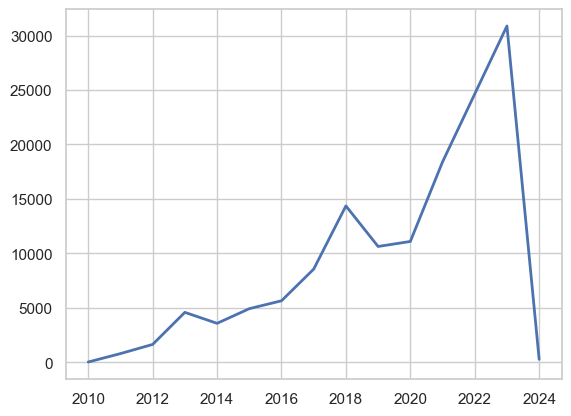

In [23]:
fig, ax = plt.subplots()

ax.plot(x2, y2, linewidth=2.0)

plt.show()

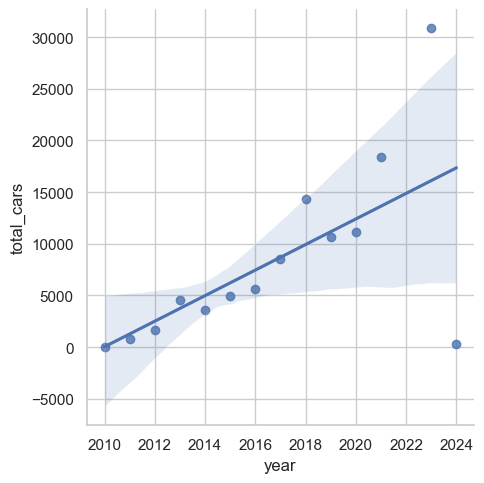

In [24]:
sns.lmplot(x="year", 
           y="total_cars",
          data = NewCars)

In [25]:
X_train = x.to_numpy()
y_train = y.to_numpy()

In [26]:
X_train= X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [27]:
def polynomial_function(degree):
    
    x = X_train
    
    y = y_train

    df = pd.DataFrame({'x':[x], 'y':[y]}).T
    df.columns = [''] * len(df.columns)
    display(df)
    
    return x, y

In [28]:
def fit(x, y, degree=2):
    
    x = np.array(x).reshape(-1, 1)

    poly = PolynomialFeatures(degree)
    poly_features = poly.fit_transform(x.reshape(-1, 1))

    lr = LR()
    lr.fit(poly_features, y)
    y_pred = lr.predict(poly_features)
    plt.plot(x, y_pred)
    plt.scatter(x, y)
    plt.title(f'Degree = {degree}')
    plt.show()

,
x,"[[1998], [1999], [2000], [2002], [2003], [2008..."
y,"[[1], [4], [9], [2], [1], [18], [25], [797], [..."


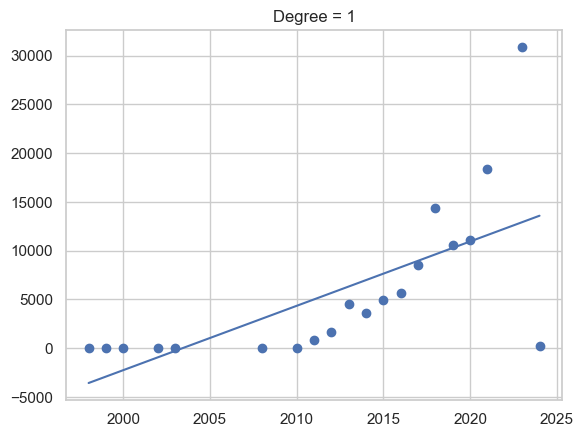

In [31]:
x, y = polynomial_function(degree=2)
fit(x, y, degree=1)

,
x,"[[1998], [1999], [2000], [2002], [2003], [2008..."
y,"[[1], [4], [9], [2], [1], [18], [25], [797], [..."


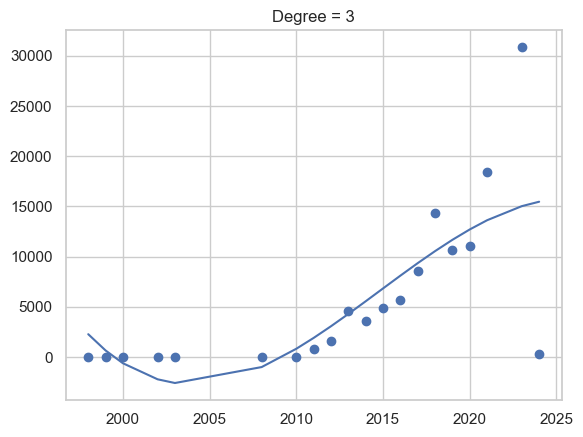

In [32]:
x, y = polynomial_function(degree=2)
fit(x, y, degree=3)

,
x,"[[1998], [1999], [2000], [2002], [2003], [2008..."
y,"[[1], [4], [9], [2], [1], [18], [25], [797], [..."


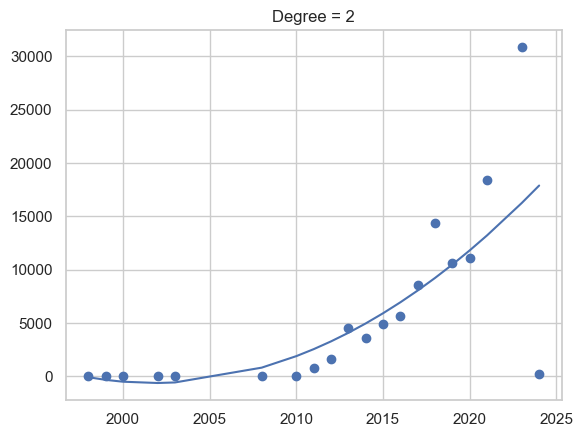

In [33]:
x, y = polynomial_function(degree=2)
fit(x, y, degree=2)

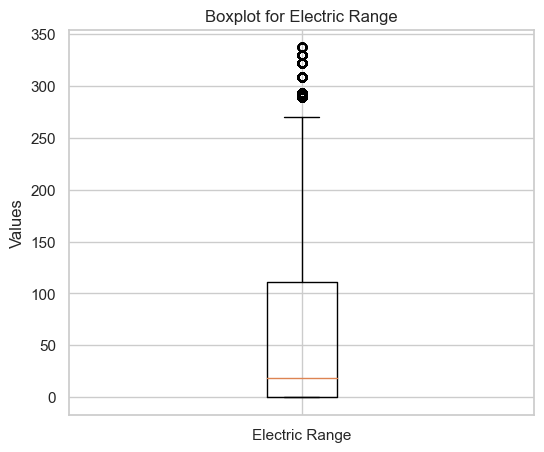

In [34]:
# Create a boxplot for Electric Range
plt.figure(figsize=(6,5))
plt.boxplot(df['Electric Range'], labels=['Electric Range'])
plt.title('Boxplot for Electric Range')
plt.ylabel('Values')
plt.show()

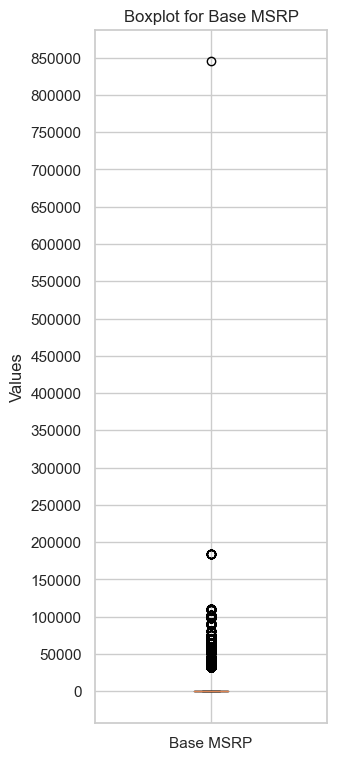

In [35]:
#Boxplot for Base MSRP
plt.figure(figsize=(3,9))
plt.boxplot(df['Base MSRP'], labels=['Base MSRP'])
plt.title('Boxplot for Base MSRP')
plt.ylabel('Values')
plt.yticks(range(0, 900000, 50000))
plt.show()

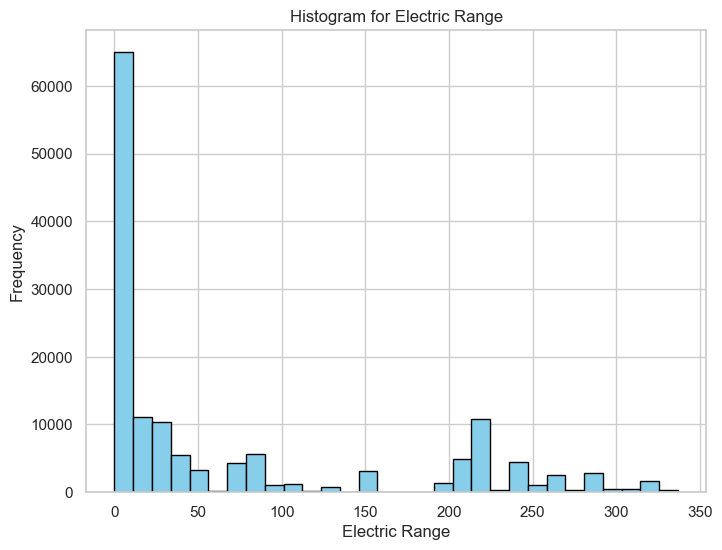

In [36]:
#Creating Histogram of Electric range
plt.figure(figsize=(8, 6))
plt.hist(df['Electric Range'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Histogram for Electric Range')
plt.show()

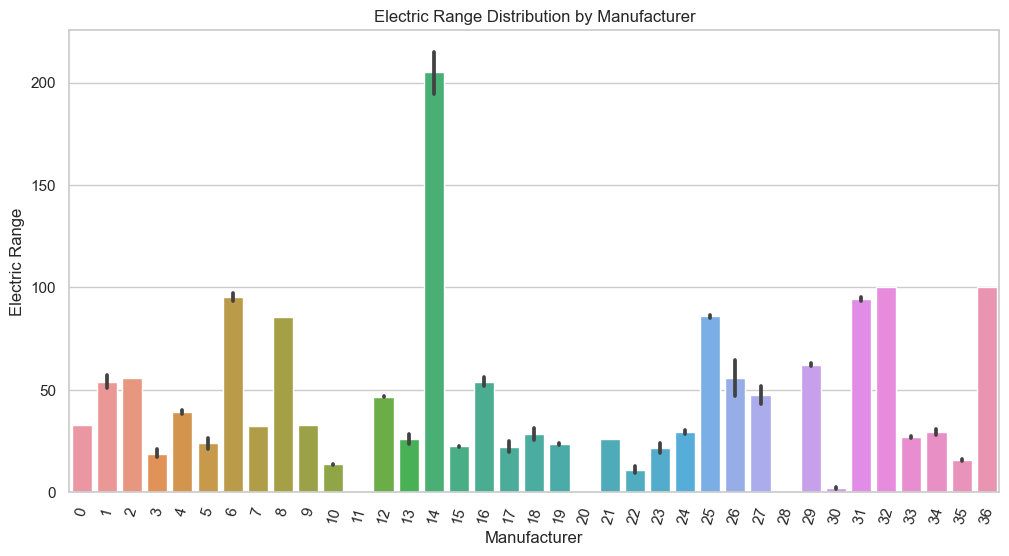

In [37]:
#Creating bar plot for Electric Range by Manufacturer
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Electric Range', data=df)
plt.xlabel('Manufacturer')
plt.ylabel('Electric Range')
plt.title('Electric Range Distribution by Manufacturer')
plt.xticks(rotation=75)
plt.show()

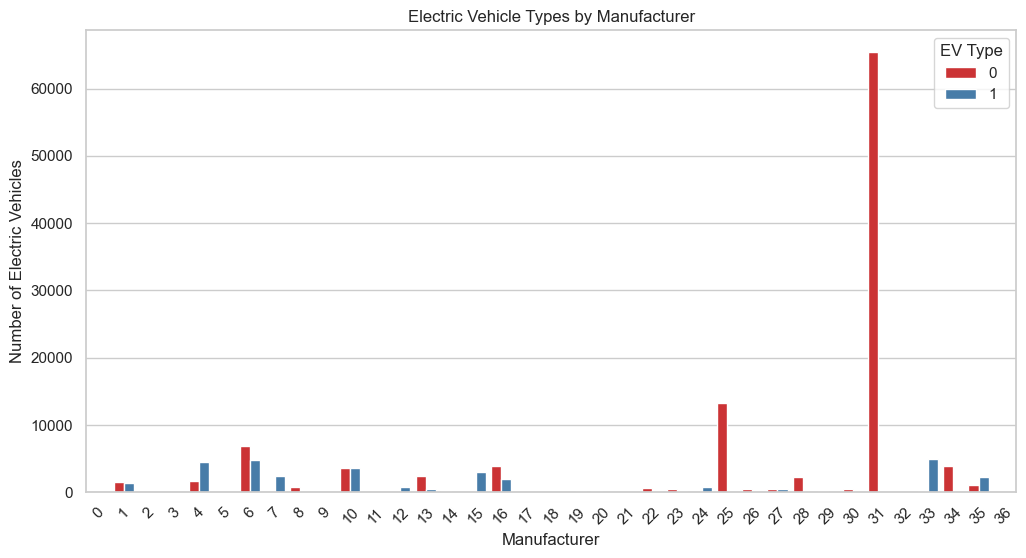

In [38]:
#creating countplot for Vehicle Type by Manufacturer
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', hue='Electric Vehicle Type', data=df, palette='Set1')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Electric Vehicles')
plt.title('Electric Vehicle Types by Manufacturer')
plt.xticks(rotation=45)
plt.legend(title='EV Type', loc='upper right')
plt.show()

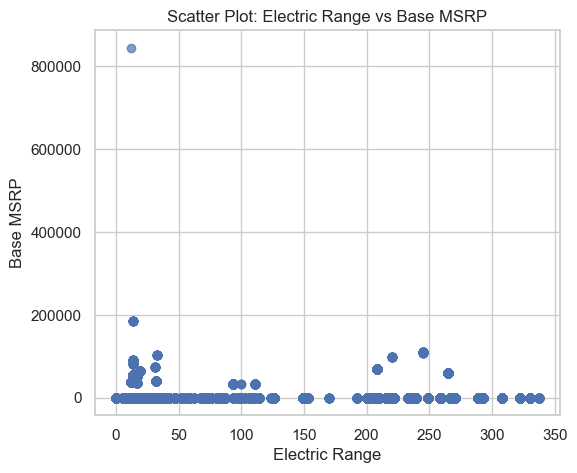

In [39]:
#Scatter plot of range vs MSRP
plt.figure(figsize=(6,5))
plt.scatter(df['Electric Range'], df['Base MSRP'], alpha=0.7)
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.title('Scatter Plot: Electric Range vs Base MSRP')
plt.show()

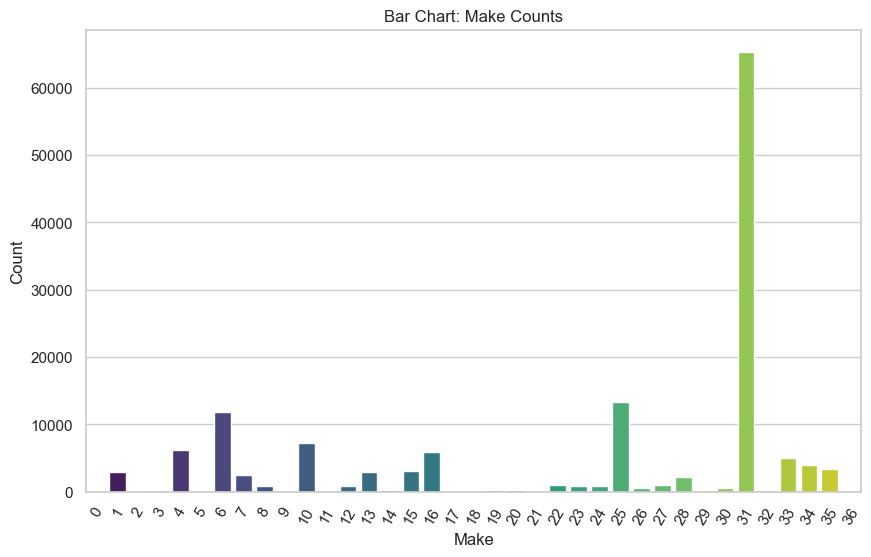

In [40]:
#count of cars by manufacturer
plt.figure(figsize=(10, 6))
sns.countplot(x='Make', data=df, palette='viridis')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Bar Chart: Make Counts')
plt.xticks(rotation=60)
plt.show()

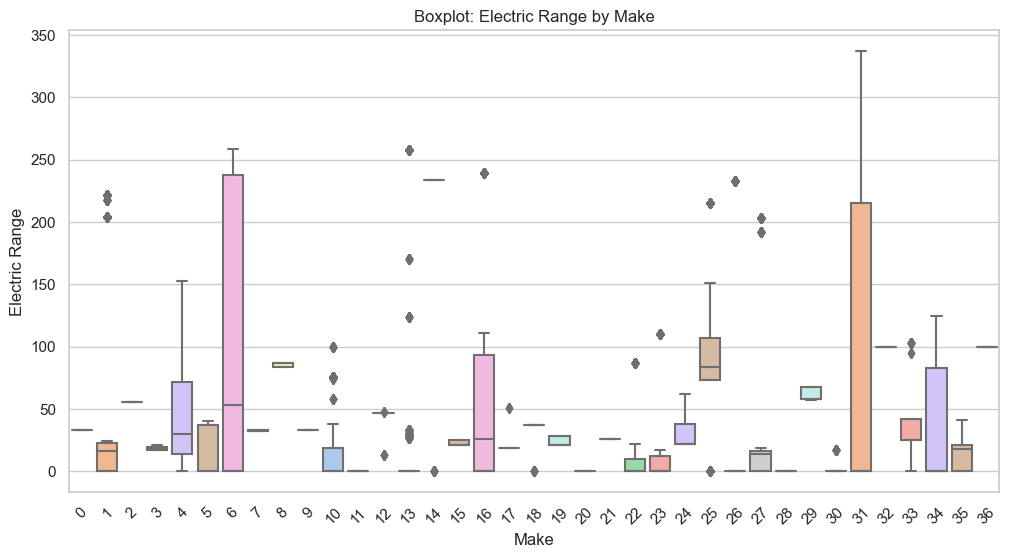

In [41]:
#boxplot of electric ranges w.r.t Manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Electric Range', data=df, palette='pastel')
plt.xlabel('Make')
plt.ylabel('Electric Range')
plt.title('Boxplot: Electric Range by Make')
plt.xticks(rotation=45)
plt.show()

In [46]:
df.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,Make Grouped
0,2023,4,123,1,0,30,0,36.0,218985539,57,0
1,2022,10,42,1,0,38,0,15.0,197264322,64,2
2,2018,6,17,0,0,238,0,36.0,168549727,57,1
3,2013,31,73,0,0,208,69900,41.0,244891062,73,5
4,2015,10,20,1,2,19,0,26.0,134915000,72,2


In [47]:
df1=pd.read_csv('Electric_Vehicle_Population_Data.csv')

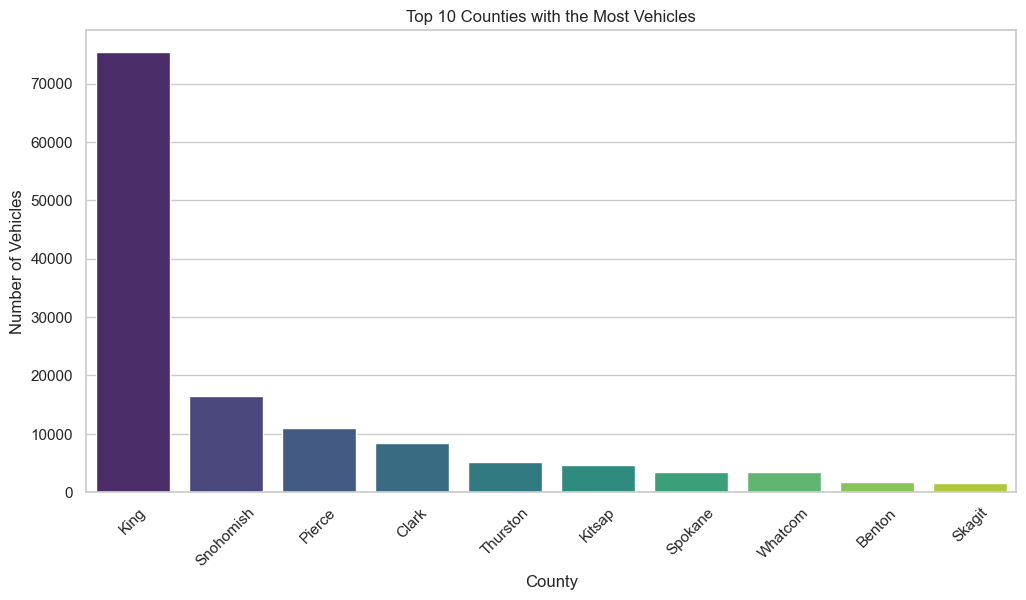

In [48]:
#Top 10 counties with most vehicles
plt.figure(figsize=(12, 6))
top_counties = df1['County'].value_counts().nlargest(10)  # Select the top 10 counties
sns.barplot(x=top_counties.index, y=top_counties.values, palette='viridis')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.title('Top 10 Counties with the Most Vehicles')
plt.xticks(rotation=45)
plt.show()

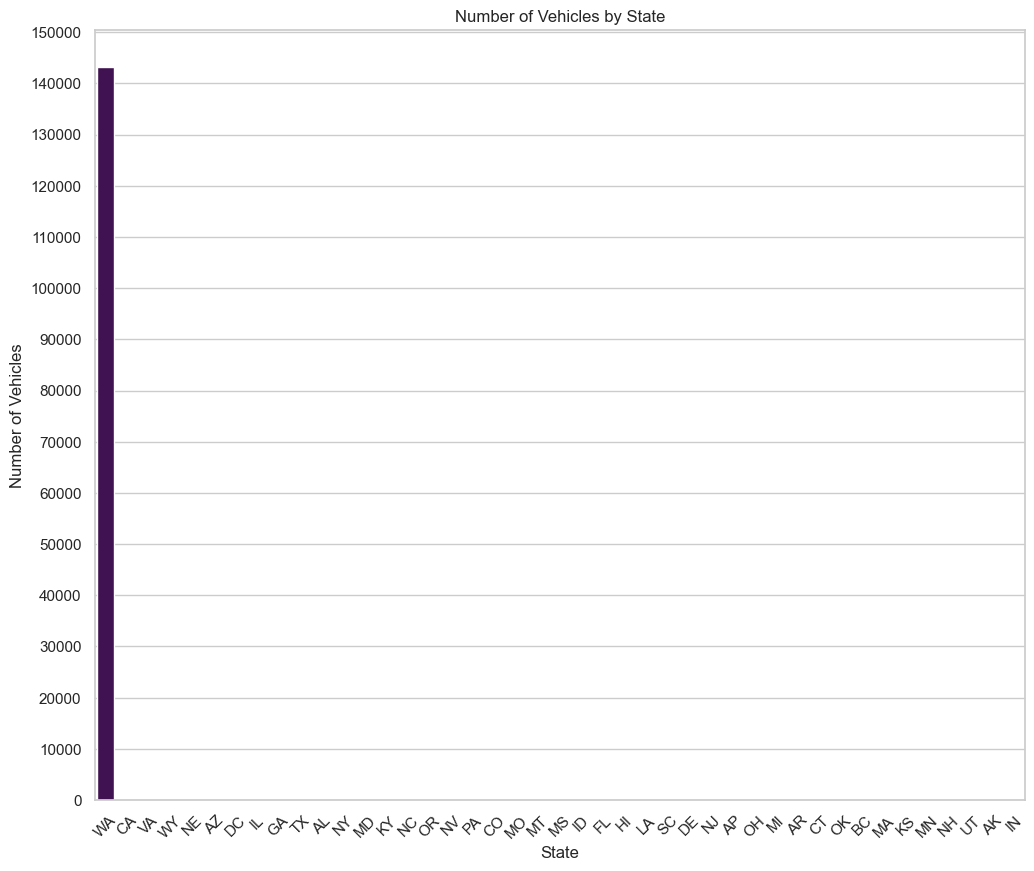

In [49]:
#Number of vehicles by state
plt.figure(figsize=(12,10))
sns.countplot(x='State', data=df1, palette='viridis')
plt.xlabel('State')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by State')
plt.xticks(rotation=45)
plt.yticks(range(0,160000,10000))


plt.show()

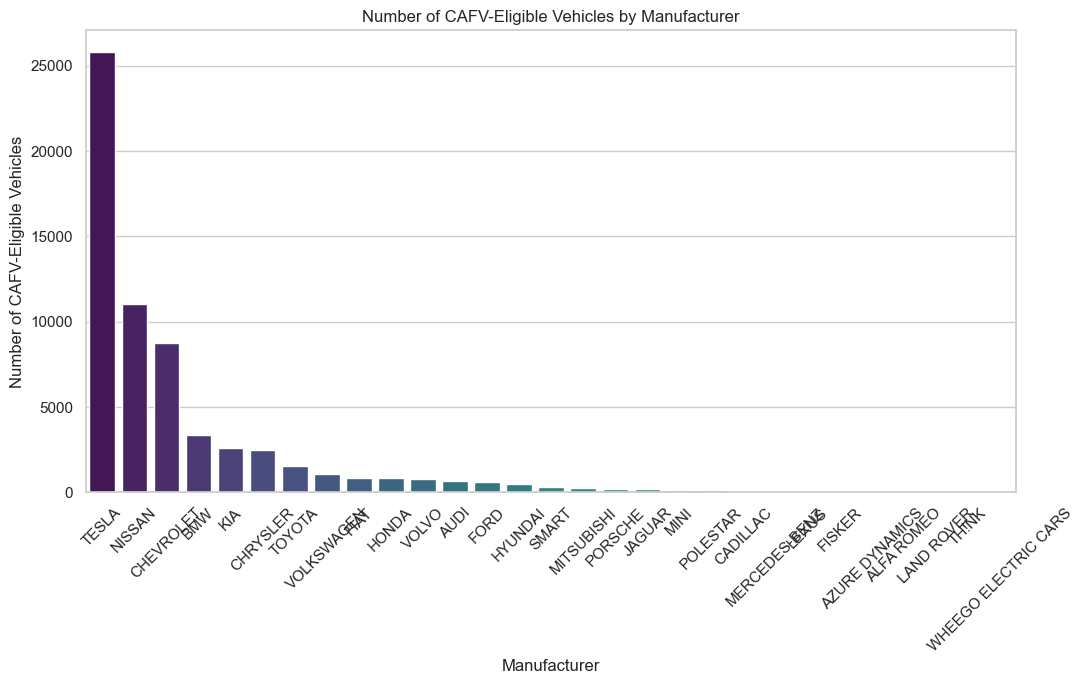

In [50]:
#Number of CAFV Eligible Vehicles by Manufacturer
plt.figure(figsize=(12, 6))
caf_count_by_make = df1[df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']['Make'].value_counts()
sns.barplot(x=caf_count_by_make.index, y=caf_count_by_make.values, palette='viridis')
plt.xlabel('Manufacturer')
plt.ylabel('Number of CAFV-Eligible Vehicles')
plt.title('Number of CAFV-Eligible Vehicles by Manufacturer')
plt.xticks(rotation=45)
plt.show()

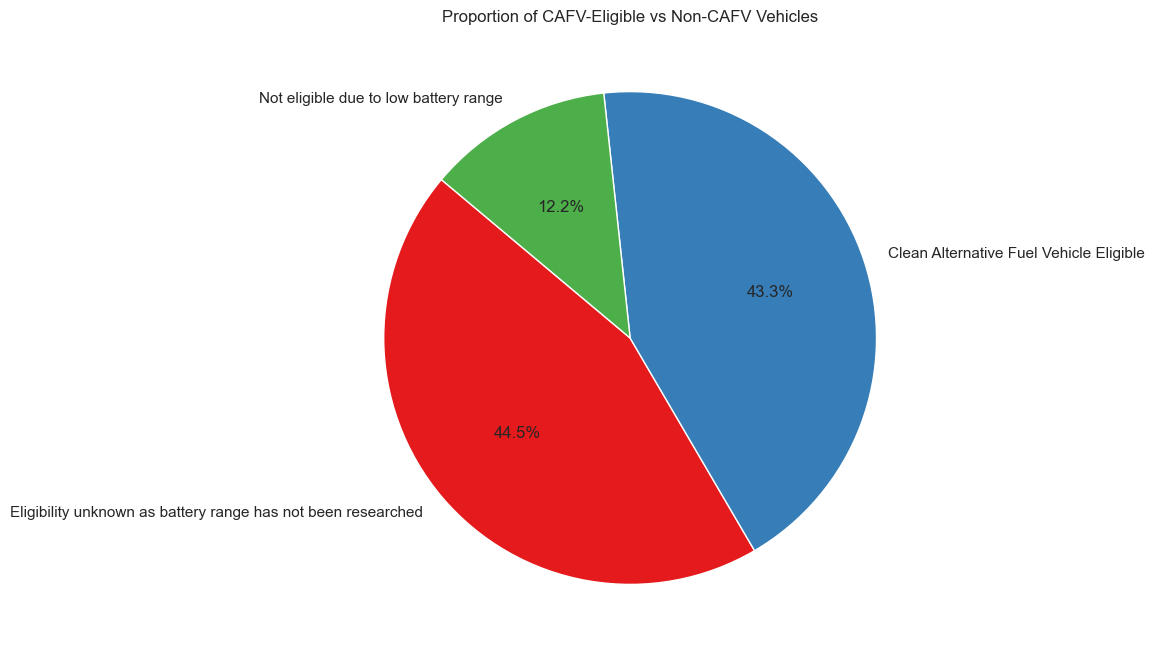

In [51]:
#CAFV eligible vs Non-eligible Vehicles
caf_counts = df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(caf_counts, labels=caf_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.title('Proportion of CAFV-Eligible vs Non-CAFV Vehicles')
plt.show()

Summary
Base MSRP is set 0 for many vehicles
Proportion CAFV eligible vehicles is less compared to other.
Tesla has highest number of CAFV eligible vehicles.
Washington has highest number of electric vehicles.
King county has most vehicles registerd .
Jaguar has the highest electric range.

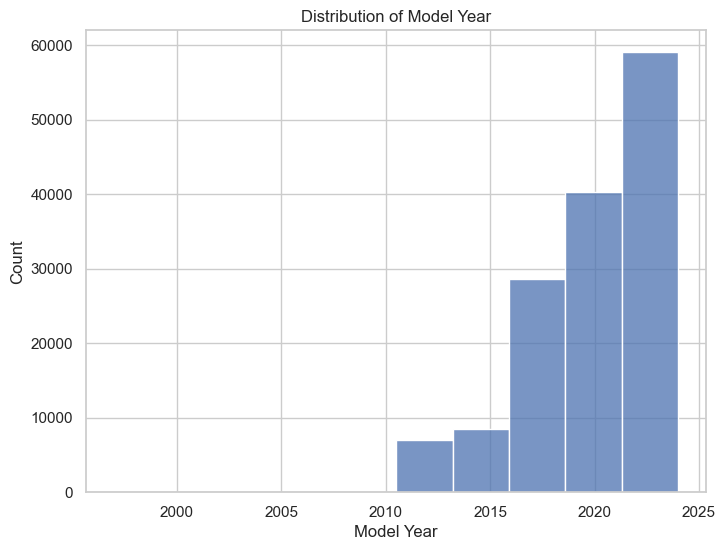

In [52]:
# Plot a histogram of the Model Year column
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='Model Year', bins=10)
plt.title('Distribution of Model Year')
plt.show()

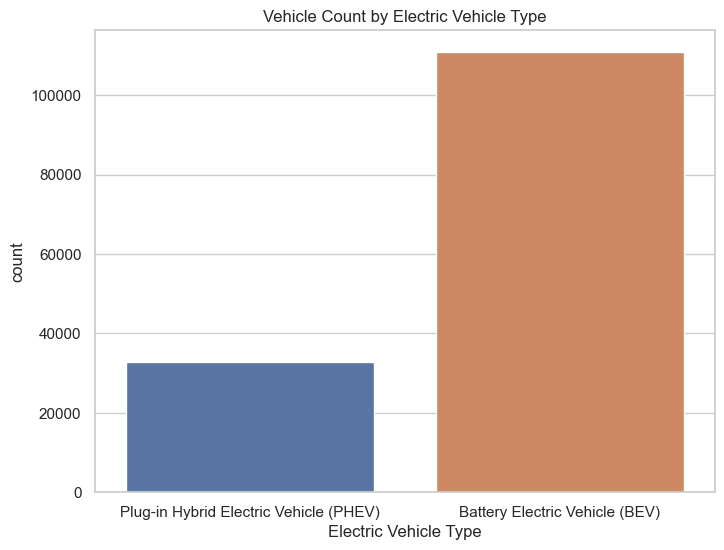

In [53]:
# Plot a bar chart of vehicle counts by Electric Vehicle Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Electric Vehicle Type')
plt.title('Vehicle Count by Electric Vehicle Type')
plt.show()

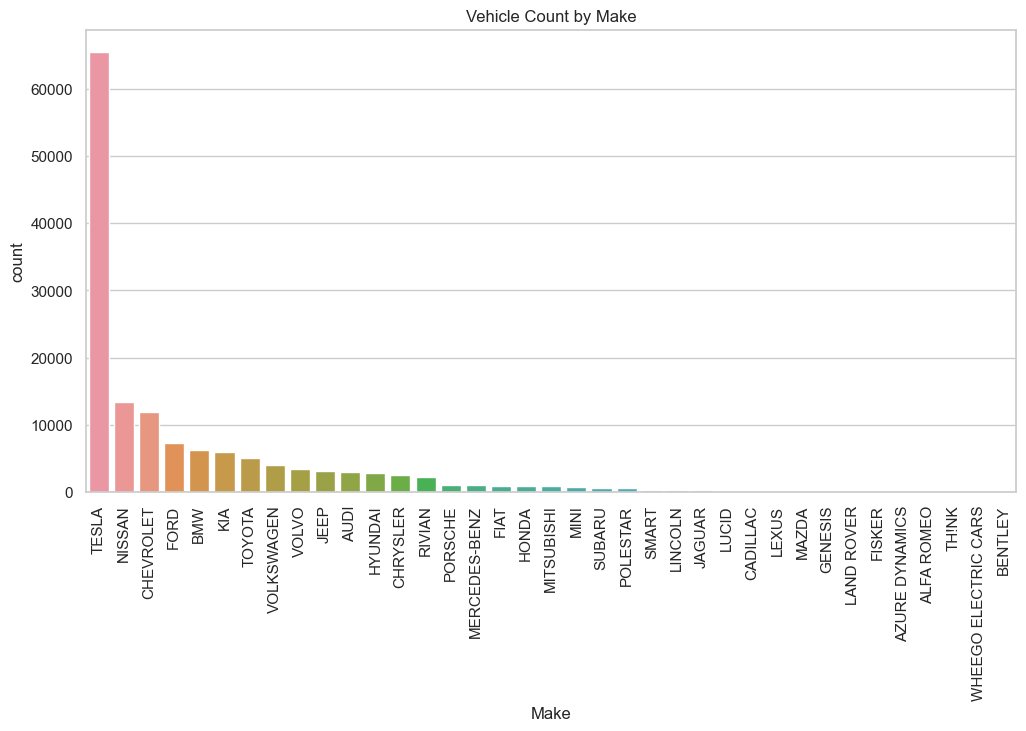

In [55]:
# Plot a bar chart of vehicle counts by Make
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='Make', order=df1['Make'].value_counts().index)
plt.title('Vehicle Count by Make')
plt.xticks(rotation=90)
plt.show()

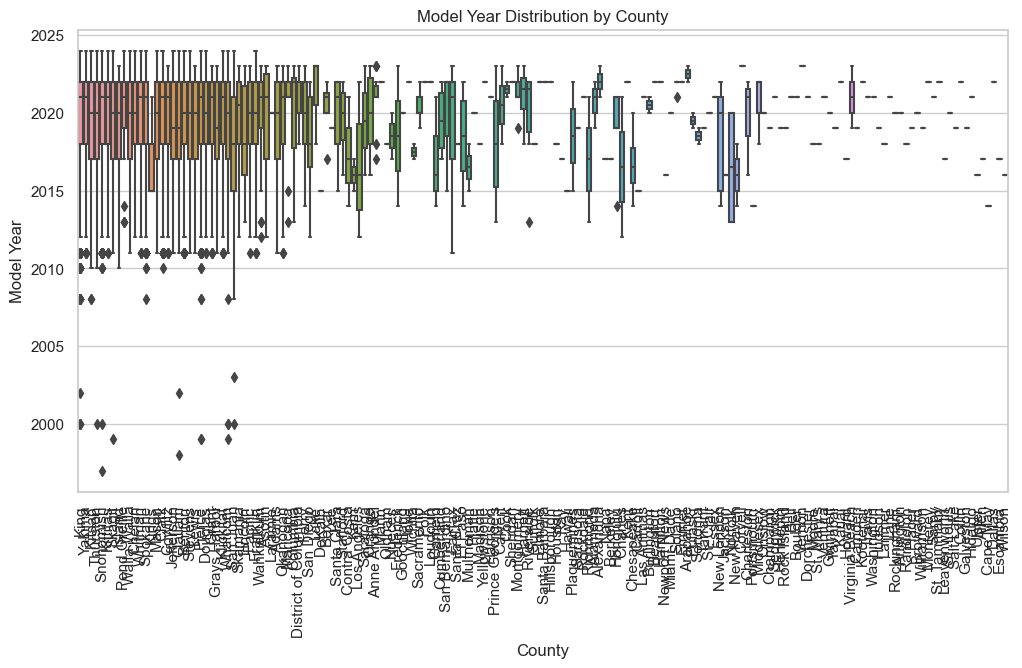

In [56]:
# Create a box plot of Model Year by County
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='County', y='Model Year')
plt.title('Model Year Distribution by County')
plt.xticks(rotation=90)
plt.show()

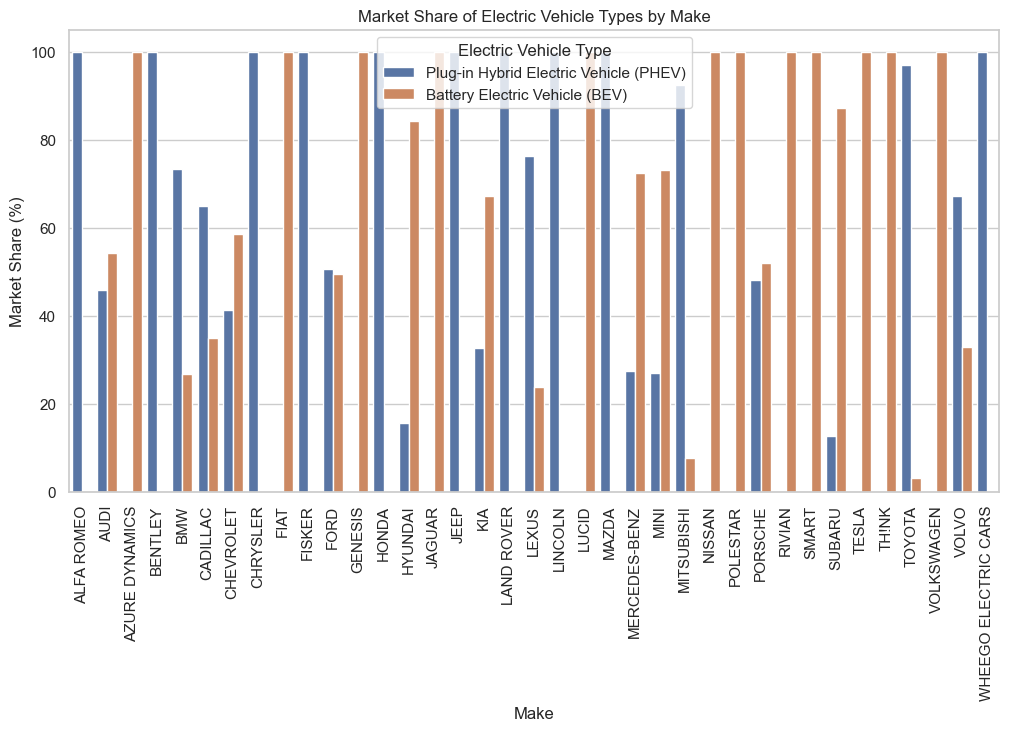

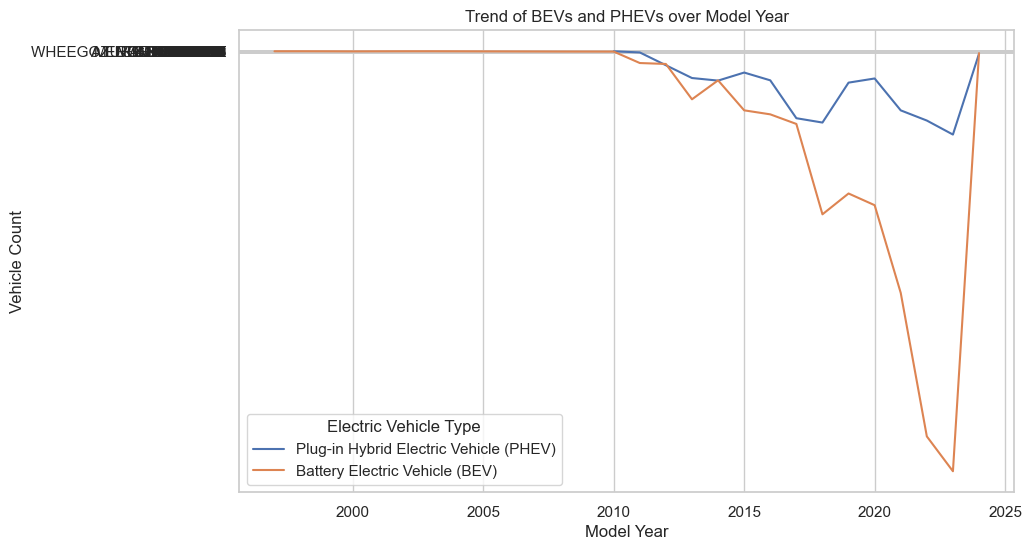

In [57]:
# Filter relevant columns for analysis
df_market = df1[['Make', 'Electric Vehicle Type', 'Model Year']]

# Calculate the count of vehicles by Make and Electric Vehicle Type
market_share = df_market.groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Calculate the total count of vehicles by Make
total_vehicles = market_share.groupby('Make')['Count'].sum().reset_index(name='Total')

# Calculate the market share percentage for each Electric Vehicle Type
market_share = market_share.merge(total_vehicles, on='Make')
market_share['Market Share (%)'] = (market_share['Count'] / market_share['Total']) * 100

# Plot the market share of Electric Vehicle Types by Make
plt.figure(figsize=(12, 6))
sns.barplot(data=market_share, x='Make', y='Market Share (%)', hue='Electric Vehicle Type')
plt.title('Market Share of Electric Vehicle Types by Make')
plt.xlabel('Make')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=90)
plt.legend(title='Electric Vehicle Type')
plt.show()

# Plot the trend of BEVs and PHEVs over Model Year
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_market, x='Model Year', y='Make', hue='Electric Vehicle Type', estimator='count', ci=None)
plt.title('Trend of BEVs and PHEVs over Model Year')
plt.xlabel('Model Year')
plt.ylabel('Vehicle Count')
plt.legend(title='Electric Vehicle Type')
plt.show()

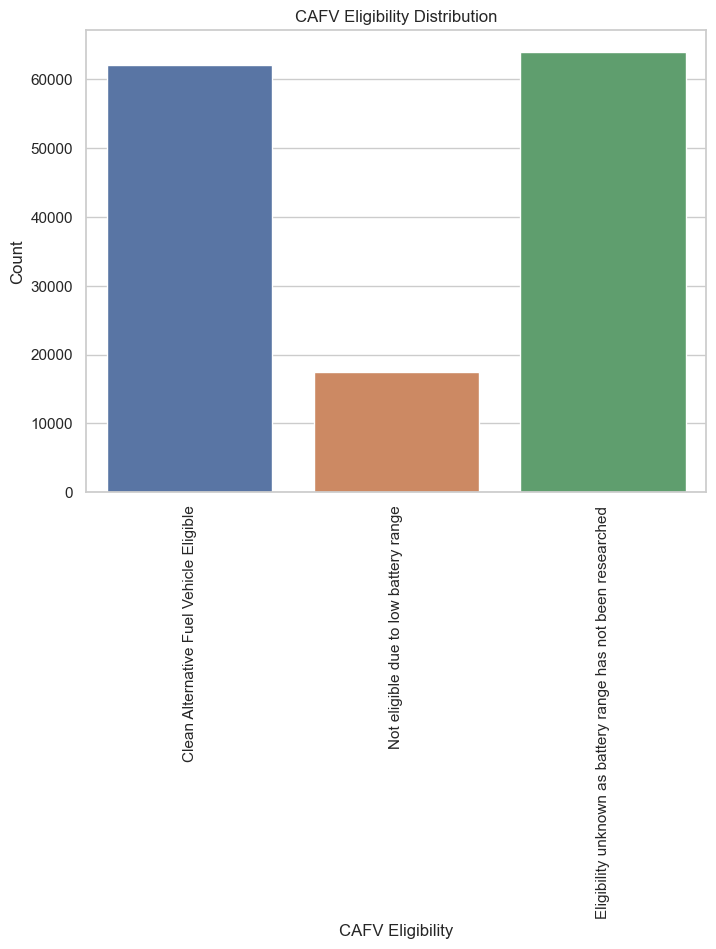

Percentage of Eligible Vehicles: 0.00%
Percentage of Non-Eligible Vehicles: 0.00%


In [59]:
# Analyze CAFV Eligibility
caf_eligibility_counts = df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Plot the CAFV Eligibility distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('CAFV Eligibility Distribution')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Calculate the percentage of eligible and non-eligible vehicles
total_vehicles = df1.shape[0]
eligible_percentage = (caf_eligibility_counts.get('Eligible', 0) / total_vehicles) * 100
non_eligible_percentage = (caf_eligibility_counts.get('Not eligible', 0) / total_vehicles) * 100

print(f"Percentage of Eligible Vehicles: {eligible_percentage:.2f}%")
print(f"Percentage of Non-Eligible Vehicles: {non_eligible_percentage:.2f}%")

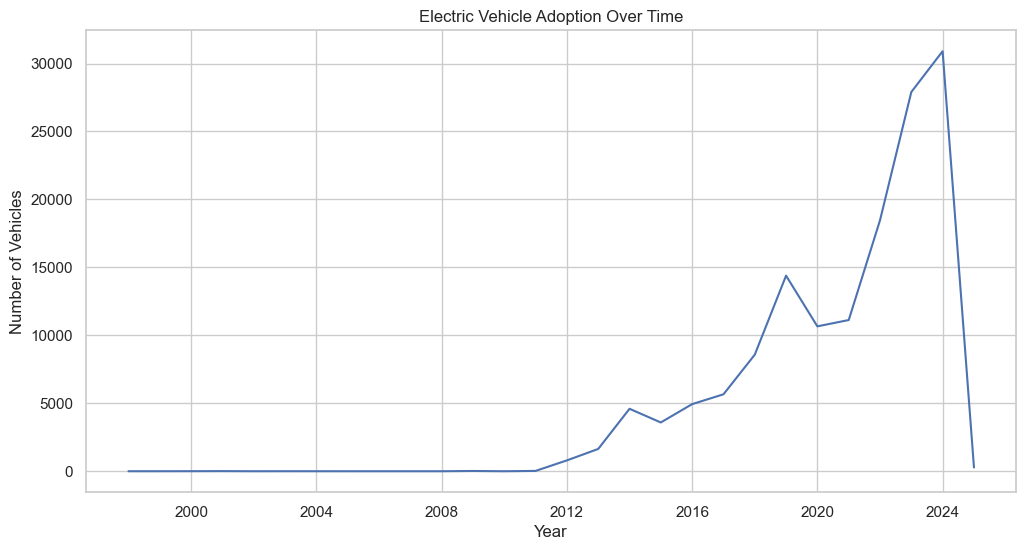

In [60]:
# Convert 'Model Year' column to datetime format
df1['Model Year'] = pd.to_datetime(df1['Model Year'], format='%Y')

# Set 'Model Year' as the index
df1.set_index('Model Year', inplace=True)

# Group the data by year and count the number of vehicles
yearly_counts = df1.resample('Y').size()

# Plot the time series of electric vehicle adoption
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts)
plt.title('Electric Vehicle Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.show()


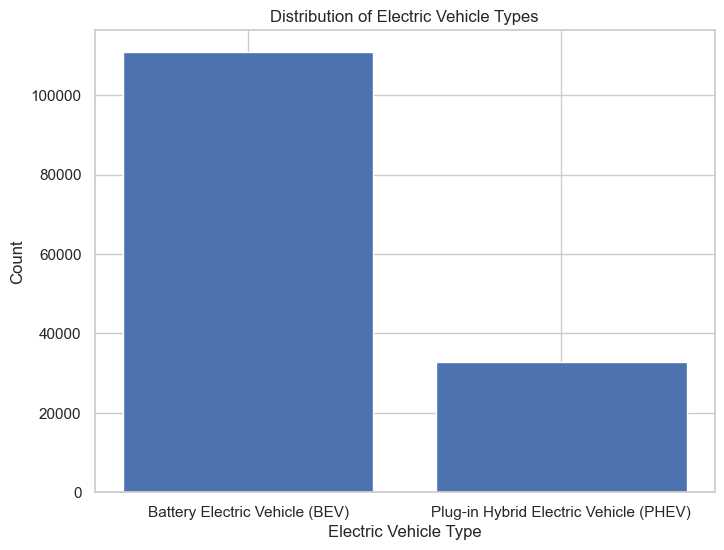

In [61]:
# Count the number of each electric vehicle type
type_counts = df1['Electric Vehicle Type'].value_counts()

# Plot the distribution of electric vehicle types
plt.figure(figsize=(8, 6))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types')
plt.show()

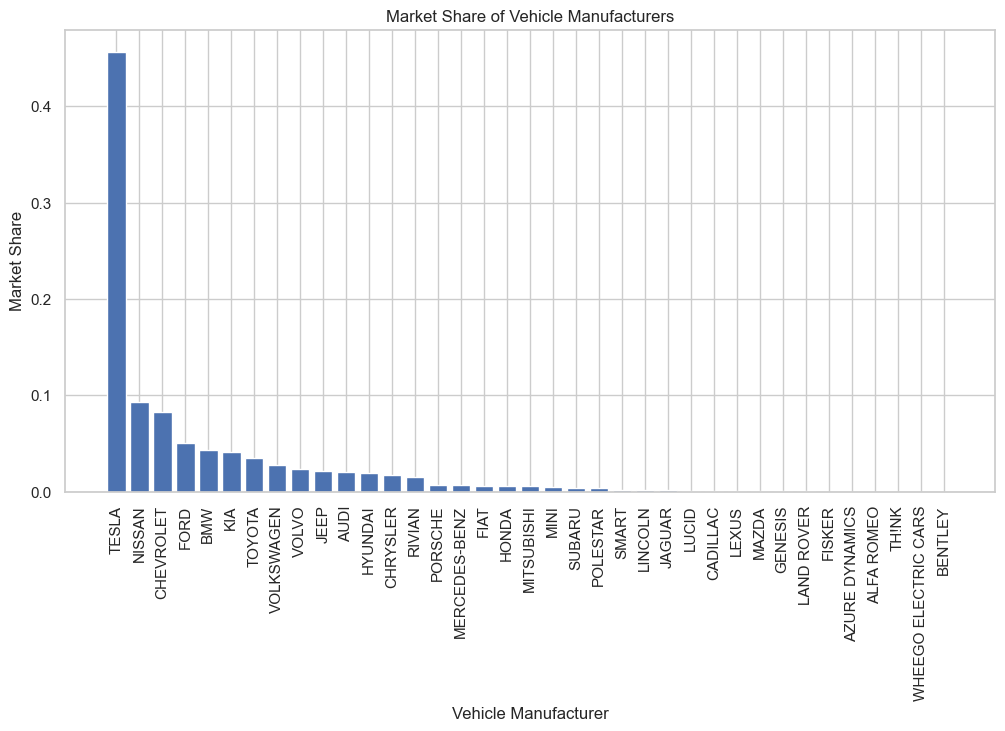

In [62]:
# Calculate the market share of vehicle manufacturers
manufacturer_counts = df1['Make'].value_counts()
total_vehicles = manufacturer_counts.sum()
market_share = manufacturer_counts / total_vehicles

# Plot the market share of vehicle manufacturers
plt.figure(figsize=(12, 6))
plt.bar(market_share.index, market_share.values)
plt.xlabel('Vehicle Manufacturer')
plt.ylabel('Market Share')
plt.title('Market Share of Vehicle Manufacturers')
plt.xticks(rotation=90)
plt.show()